In [111]:
# Load Dependencies
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import sklearn.metrics as metrics
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SimpleRNN , LSTM
from keras.datasets import imdb
from keras.callbacks import TensorBoard
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [76]:
# Hyper-Parameters
max_fatures = 3000
no_classes = 1
max_length = 100
batch_size = 64
embedding_vector = 64
dropout_rate = 0.5
no_epochs = 3

In [77]:
# read file into pandas using a relative path
path = 'sms.tsv'
sms = pd.read_table(path, header=None, names=['label', 'message'])
print('Data loaded successfully.')
print(sms.shape)
print(sms.head())

Data loaded successfully.
(5572, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


C:\Users\hp\Conda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
sms['message'] = sms['message'].apply(lambda x: x.lower())
sms['message'] = sms['message'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [79]:
print(sms.head())

  label                                            message
0   ham  go until jurong point crazy available only in ...
1   ham                            ok lar joking wif u oni
2  spam  free entry in 2 a wkly comp to win fa cup fina...
3   ham        u dun say so early hor u c already then say
4   ham  nah i dont think he goes to usf he lives aroun...


ham     4825
spam     747
Name: label, dtype: int64


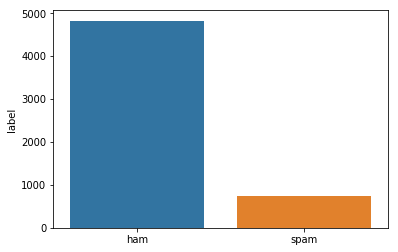

In [99]:
# # Class Distribution
class_dist = sms.label.value_counts()
print(class_dist)
sns.barplot(class_dist.index,class_dist)

In [81]:
# Data Preprocessing
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(sms['message'].values)
X = tokenizer.texts_to_sequences(sms['message'].values)
X = pad_sequences(X, maxlen=max_length)

In [83]:
#split data
Y = sms.label.map({'ham':0, 'spam':1})

def split_data(X):
    training = X[:int(len(X)*0.5)] # 50% for training
    validation = X[int(len(X)*0.5):int(len(X)*0.75)] # 25% for training
    testing = X[int(len(X)*0.75):] # 25% for training
    return training,validation,testing

X_train , X_validate , X_test = split_data(X)
Y_train , Y_validate , Y_test = split_data(Y)
print(len(X_train) , len(X_validate) , len(X_test))
print(len(Y_train) , len(Y_validate) , len(Y_test))


2786 1393 1393
2786 1393 1393


## SimpleRNN

In [65]:
# Design Neural Network Architecture with SimpleRNN
print('Building Simple RNN Model..')

RNN_model = Sequential()
# Add Embedding layer
RNN_model.add(Embedding(max_fatures, embedding_vector, input_length=max_length))
RNN_model.add(Dropout(dropout_rate))
# Add Simple RNN layer
RNN_model.add(SimpleRNN(units = 64 ,input_shape=(100, 64)))
# Add Dense Hidden Layer
RNN_model.add(Dense(256, activation='relu'))
RNN_model.add(Dropout(dropout_rate))
RNN_model.add(Dense(128, activation='relu'))
RNN_model.add(Dropout(dropout_rate))
# Output Layer 
RNN_model.add(Dense(no_classes, activation='sigmoid'))

Building Simple RNN Model..


In [66]:
RNN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 64)           192000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

## LSTM

In [84]:
# Design Neural Network Architecture with SimpleRNN
print('Building Simple RNN Model..')

RNN_model = Sequential()
# Add Embedding layer
RNN_model.add(Embedding(max_fatures, embedding_vector, input_length=max_length))
RNN_model.add(Dropout(dropout_rate))
# Add Simple RNN layer
RNN_model.add(LSTM(units = 64 , dropout=0.2, recurrent_dropout=0.2, input_shape=(100, 64)))
# Add Dense Hidden Layer
RNN_model.add(Dense(256, activation='relu'))
RNN_model.add(Dropout(dropout_rate))
RNN_model.add(Dense(128, activation='relu'))
RNN_model.add(Dropout(dropout_rate))
# Output Layer 
RNN_model.add(Dense(no_classes, activation='sigmoid'))

Building Simple RNN Model..


In [85]:
RNN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 64)           192000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
__________

In [86]:
# Configure model
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
# Train!
print('Training the model..')
history = RNN_model.fit(X_train, Y_train, batch_size=batch_size, verbose=2, epochs=no_epochs, validation_data=(X_validate, Y_validate))

Training the model..
Train on 2786 samples, validate on 1393 samples
Epoch 1/3
 - 12s - loss: 0.0276 - acc: 0.9910 - val_loss: 0.0805 - val_acc: 0.9806
Epoch 2/3
 - 11s - loss: 0.0172 - acc: 0.9961 - val_loss: 0.0924 - val_acc: 0.9785
Epoch 3/3
 - 11s - loss: 0.0100 - acc: 0.9978 - val_loss: 0.1329 - val_acc: 0.9777


In [88]:
# evaluate the classification model
_,acc = RNN_model.evaluate(X_test, Y_test)
print("acc: %.2f" % (acc))

1393/1393 [==============================] - 2s 1ms/step
acc: 0.98


In [89]:
# confusion matrix
y_pred = RNN_model.predict(X_test,batch_size=1,verbose = 2)
y_pred = np.where(y_pred < 0.5, 0, 1)
matrix = metrics.confusion_matrix(y_pred,Y_test)
print(matrix)


[[1202   17]
 [   9  165]]


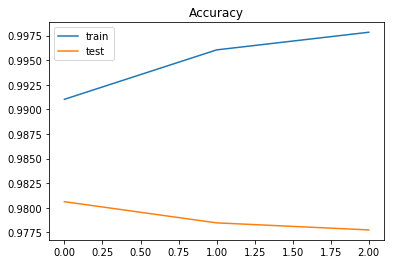

In [113]:
# Accuracy vs Epoch
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

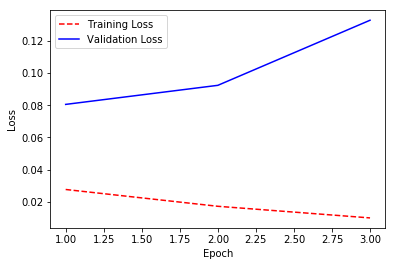

In [114]:
# Loss vs Epoch
epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Making predictions on new data

In [74]:
msg = ['u dun say so early hor u c already then say i dont think he goes to usf he lives aroun.']
#vectorizing the tweet by the pre-fitted tokenizer instance
msg = tokenizer.texts_to_sequences(msg)
#padding the tweet to have exactly the same shape as `embedding_2` input
msg = pad_sequences(msg, maxlen=max_length, dtype='int32', value=0)
print(msg)
sentiment = RNN_model.predict(msg,batch_size=1,verbose = 2)
print(sentiment)
if(sentiment[0][0] >= .5):
    print("Spam")
else:
    print("Ham")


[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    6  231  140   24
   362 2885    6  161  143   60  140    2   43   98   72  463    1  903
    72 1834]]
[[0.00215031]]
Ham
